# Happening in Korea in 2019

**"Information Technology (IT) was the focus over the past 20 years and now, for the next 30 years, we will be at the age of Data Technology (DT)" (Jack Ma from Alibaba)**

-  "소프트웨어정책연구소가 지난해 발간한 ‘유망 SW분야의 미래 일자리 전망’ 보고서에 따르면 오는 2022년까지 AI 9986명, 클라우드 335명, 빅데이터 2785명, 증강현실(AR)·가상현실(VR) 1만8727명 등 총 3만1033명의 전문 인력이 부족할 것으로 전망" (2019. Feb)

- "금융감독원도  2019. 2.7일 IT·핀테크전략국 내에 디지털금융감독팀을 새로이 만드는 등"
- "금융에 IT를 더하는 방식을 넘어 아예 IT금융을 추구하는 방향으로 전환되면서 관련분야 인재 확보 경쟁은 더 치열해질 것"

- "우리은행 외부 인재 영입 명문화(디지털/M&A)"

# Maching Learning: 

**"give computers to learn without being explictly programmed (1959,  Arthur Samuel)"**

**" A computer program is said to learn from experience E with respect to some task T and some performance measure P, if its performance on T, as measured by P, improves with experience   E. (Tom Mitchell, 1997)"**

-   computer science: a subfield of artificial intelligence
-   data science: a means of building models of data

- supervised learning vs. unsupervised learning
- The vocabulary 'Learning' is due to giving <font color=red>tunable parameters </font> that can be adapted to observed data


# What is machine learning?

1. ML is about building systems learning from data
  - learning means getting better at some task
2. ML is appropriate for complex problems where no algorithmic solution

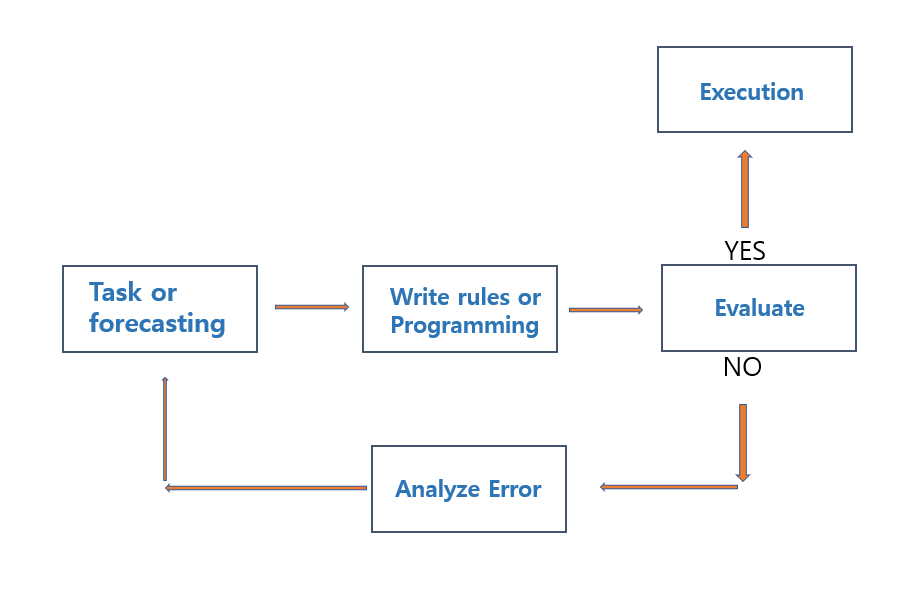

In [1]:
from IPython.display import Image
Image("c:/python/images/ML_Diagram1.PNG", width=600, height=200)

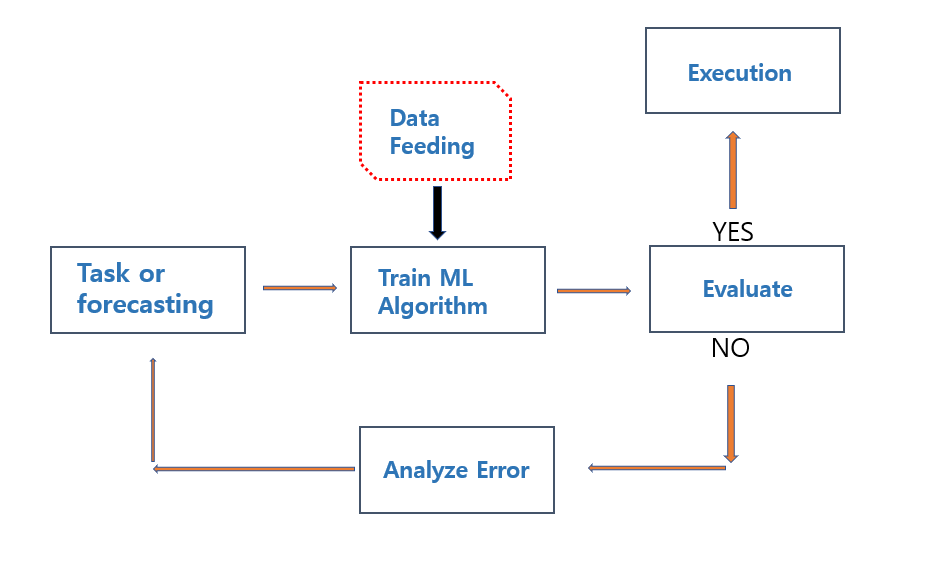

In [2]:
from IPython.display import Image
Image("c:/python/images/ML_Diagram2.PNG", width=600, height=200)

## simple example

- spam mail case
  - TR: (write a code filtering spam) $\Longrightarrow$ (failure) $\Longrightarrow$ (fix code with more spam related error) $\Longrightarrow   \cdots \cdots $ 
  - ML: (write a code filtering spam)  $\Longrightarrow$ (program learn spam related words by itself)  $\Longrightarrow$ (failure)  $\Longrightarrow$  (change algorithm) 
  
- equity forecasting
  - TR: (write a code for forecasting) $\Longrightarrow$ (failure) $\Longrightarrow$ (adding more explanatory variables) $\Longrightarrow   \cdots \cdots $ 
  - ML: (write a code for forecasting)  $\Longrightarrow$ (find rules with big data and applying algorithm)  $\Longrightarrow$ (failure)  $\Longrightarrow$  (change algorithm) 

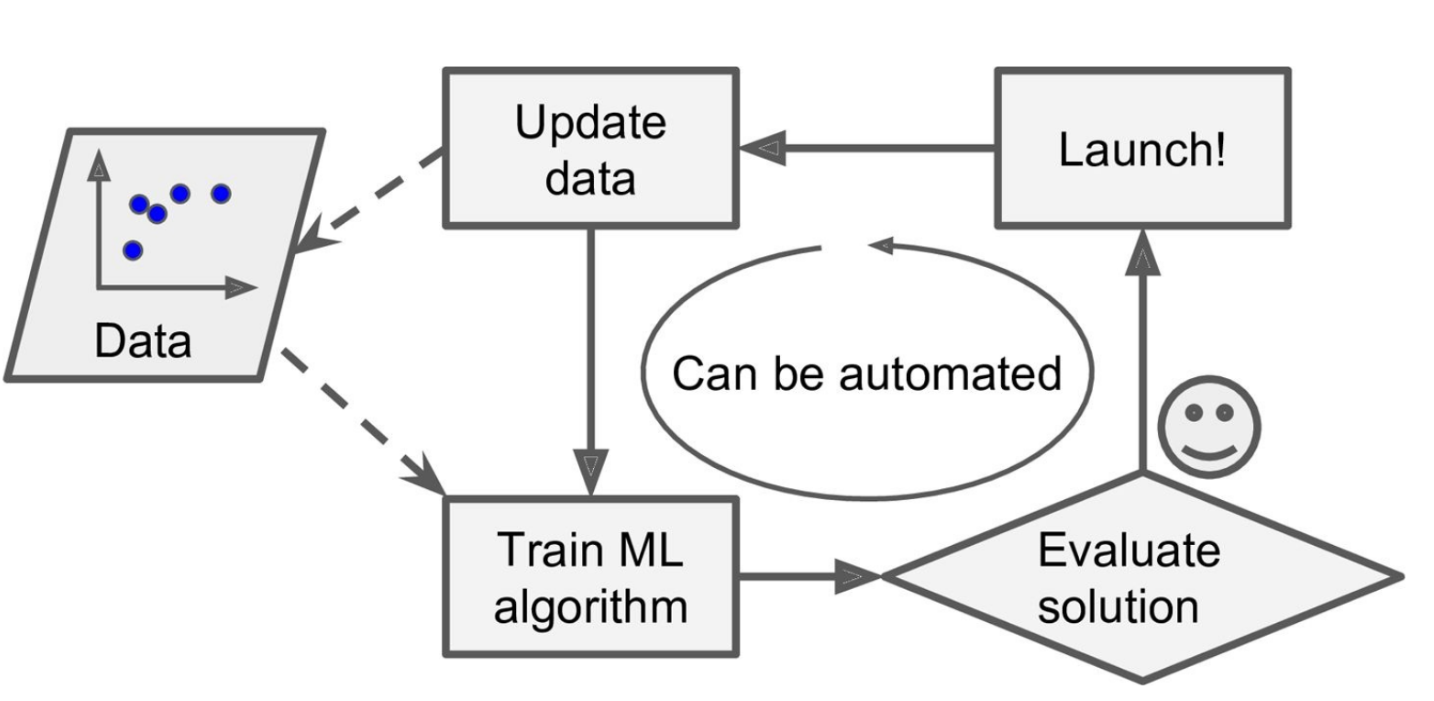

In [4]:
from IPython.display import Image
Image("c:/python/images/ML_Diagram3.PNG", width=600, height=200)
 # from Geron Aurelien

# Why ML?

1. Possible number of scenario or patterns are enormous
   - just enumeration of case is not enough
2. Volume of data is growing exponentially
   - IOT, 5G, VR  

# Supervised vs. Unsupervised Learning
- **supervised**: finding the relatioship between X(featured data) and Y(label or target data)
    - classification :the labels are discrete categories
    - regression: continuous quantities
- **unsupervised**: 'let the data speak for itself', dataset without any labelling data
    - clustering: idetifying distinct groups of data
    - dimensionality reduction: searching for more succinct representation of data
    - detect anomalies: such as defective equipment or fraud
    
- **Reinforced Learning**: in b/w SML and UML: an agent learn and choose best strategy (policy) in a given environment     

In [5]:
import matplotlib.pyplot as plt
import pandas as pd  
import numpy as np

from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC

plt.style.use('seaborn')

In [6]:
def format_plot(ax, title):
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.set_xlabel('feature 1', color='gray')
    ax.set_ylabel('feature 2', color='gray')
    ax.set_title(title, color='gray')

In [7]:
# create 50 separable points
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

# fit the support vector classifier model
clf = SVC(kernel='linear')
clf.fit(X, y)

# create some new points to predict
X2, _ = make_blobs(n_samples=80, centers=2,
                   random_state=0, cluster_std=0.80)
X2 = X2[50:]

# predict the labels
y2 = clf.predict(X2)

## Classification

In [8]:
X[:5]
y[:5]

array([1, 1, 0, 0, 1])

[-1, 4, -2, 7]

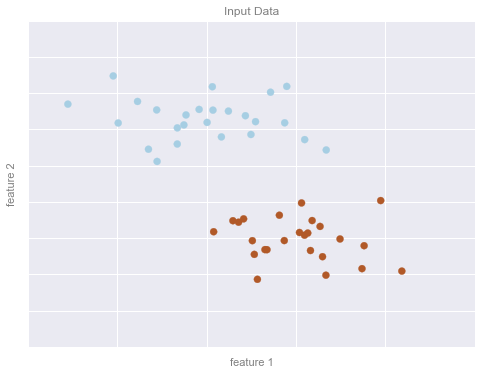

In [9]:
# plot the data
fig, ax = plt.subplots(figsize=(8, 6))
point_style = dict(cmap='Paired', s=50)
ax.scatter(X[:, 0], X[:, 1], c=y, **point_style)

# format plot
format_plot(ax, 'Input Data')
ax.axis([-1, 4, -2, 7])

[-1, 4, -2, 7]

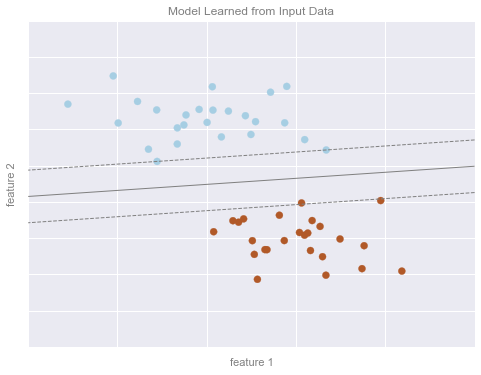

In [19]:
# Get contours describing the model
xx = np.linspace(-1, 4, 10)
yy = np.linspace(-2, 7, 10)
xy1, xy2 = np.meshgrid(xx, yy)
Z = np.array([clf.decision_function([t])
              for t in zip(xy1.flat, xy2.flat)]).reshape(xy1.shape)

# plot points and model
fig, ax = plt.subplots(figsize=(8, 6))
line_style = dict(levels = [-1.0, 0.0, 1.0],
                  linestyles = ['dashed', 'solid', 'dashed'],
                  colors = 'gray', linewidths=1)
ax.scatter(X[:, 0], X[:, 1], c=y, **point_style)
ax.contour(xy1, xy2, Z, **line_style)

# format plot
format_plot(ax, 'Model Learned from Input Data')
ax.axis([-1, 4, -2, 7])


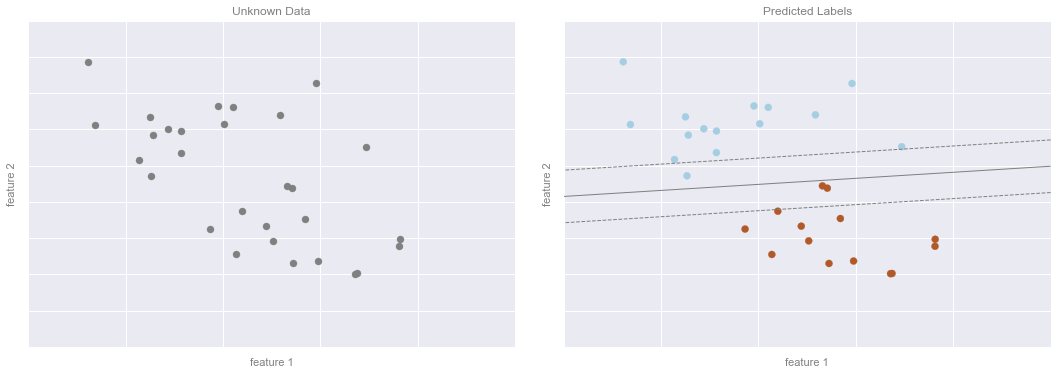

In [20]:
# plot the results
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

ax[0].scatter(X2[:, 0], X2[:, 1], c='gray', **point_style)
ax[0].axis([-1, 4, -2, 7])

ax[1].scatter(X2[:, 0], X2[:, 1], c=y2, **point_style)
ax[1].contour(xy1, xy2, Z, **line_style)
ax[1].axis([-1, 4, -2, 7])

format_plot(ax[0], 'Unknown Data')
format_plot(ax[1], 'Predicted Labels')


## Regression

In [3]:
from sklearn.linear_model import LinearRegression

# Create some data for the regression
rng = np.random.RandomState(1)

X = rng.randn(200, 2)
y = np.dot(X, [-2, 1]) + 0.1 * rng.randn(X.shape[0])

# fit the regression model
model = LinearRegression()
model.fit(X, y)

# create some new points to predict
X2 = rng.randn(100, 2)

# predict the labels
y2 = model.predict(X2)

[-4, 4, -3, 3]

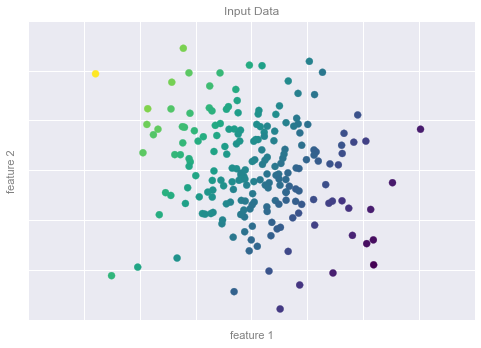

In [22]:
# plot data points
fig, ax = plt.subplots()
points = ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')

# format plot
format_plot(ax, 'Input Data')
ax.axis([-4, 4, -3, 3])


## Clustering

In [24]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

# create 50 separable points
X, y = make_blobs(n_samples=100, centers=4,
                  random_state=42, cluster_std=1.5)

# Fit the K Means model
model = KMeans(4, random_state=0)
y = model.fit_predict(X)

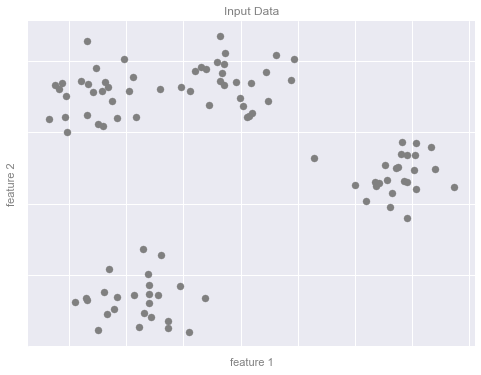

In [25]:
# plot the input data
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], s=50, color='gray')

# format the plot
format_plot(ax, 'Input Data')

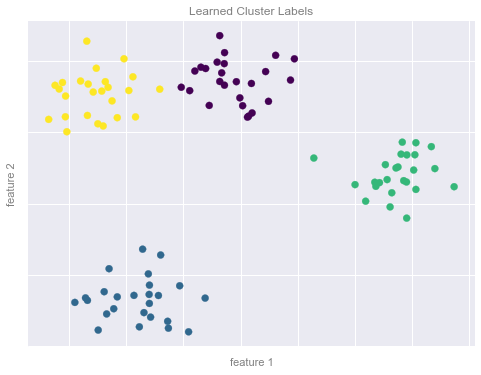

In [26]:
# plot the data with cluster labels
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], s=50, c=y, cmap='viridis')

# format the plot
format_plot(ax, 'Learned Cluster Labels')

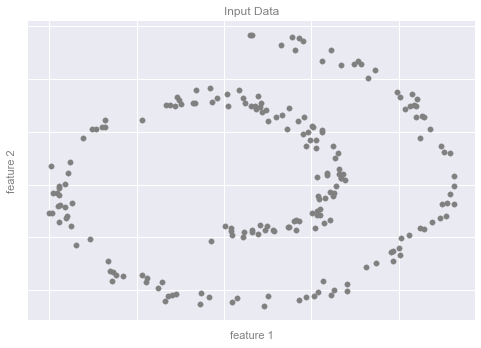

In [27]:
from sklearn.datasets import make_swiss_roll

# make data
X, y = make_swiss_roll(200, noise=0.5, random_state=42)
X = X[:, [0, 2]]

# visualize data
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], color='gray', s=30)

# format the plot
format_plot(ax, 'Input Data')

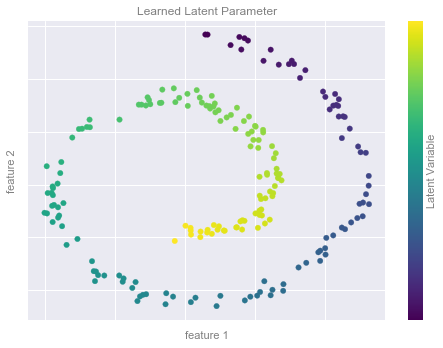

In [28]:
from sklearn.manifold import Isomap

model = Isomap(n_neighbors=8, n_components=1)
y_fit = model.fit_transform(X).ravel()

# visualize data
fig, ax = plt.subplots()
pts = ax.scatter(X[:, 0], X[:, 1], c=y_fit, cmap='viridis', s=30)
cb = fig.colorbar(pts, ax=ax)

# format the plot
format_plot(ax, 'Learned Latent Parameter')
cb.set_ticks([])
cb.set_label('Latent Variable', color='gray')

## Most common ML algorithm


1. Linear regression
2. Naive Bayes
3. $K$-nearest neighbors
4. SVM (Support vector machine)
5. Baggin and Random forest
6. Logistic Regression
7. Linear Discrminant Analysis
8. Classification and regression tress
9. Boosting and AdaBoost
11. reinforced learning
10. GAN (Generative advasarial network)

## Why ML only in Finance?

- Data problem: In order to  ML algorithm work properly, it needs commonly thousands data or million data
  - macro data: 100 yrs, monthly data are rare 
    - even it exists, maximum monthly observations are 1200, quarterly are 400
  - finance data: million second observations are available